# Problema Diseño de terapia de radiación

Este problema nos habla sobre la terapia de radiacion donde la tarea principal es maximizar la radiacion que recibiran celulas cancerigenas, y minimizar la radiacion que recibiran las celulas sanas

Este problema de forma matematica se representa de la sieguiente manera :

$$ \text{Minimizar : } Z=0.4x_1 + 0.5x_2 \\ 
\text{Sujeto a: } \\
0.3x_1 + 0.1x_2 \leq 2.7\\
0.5x_1 + 0.5x_2 =6 \\
0.6x_1 + 0.4x_2 \geq 6 
x_1 \geq 0 , x_2 \geq 0$$

In [18]:
from pyomo.environ import *

model = ConcreteModel()

model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

model.obj = Objective(
    expr=0.4 * model.x1 + 0.5 * model.x2,
    sense=minimize
)

model.c1 = Constraint(expr=0.3 * model.x1 + 0.1 * model.x2 <= 2.7)
model.c2 = Constraint(expr=0.5 * model.x1 + 0.5 * model.x2 == 6)
model.c3 = Constraint(expr=0.6 * model.x1 + 0.4 * model.x2 >= 6)


solver = SolverFactory('appsi_highs')
solver.solve(model)

print("x_1 =", value(model.x1))
print("x_2 =", value(model.x2))
print("Z  =", value(model.obj))


x_1 = 7.5
x_2 = 4.500000000000002
Z  = 5.250000000000001


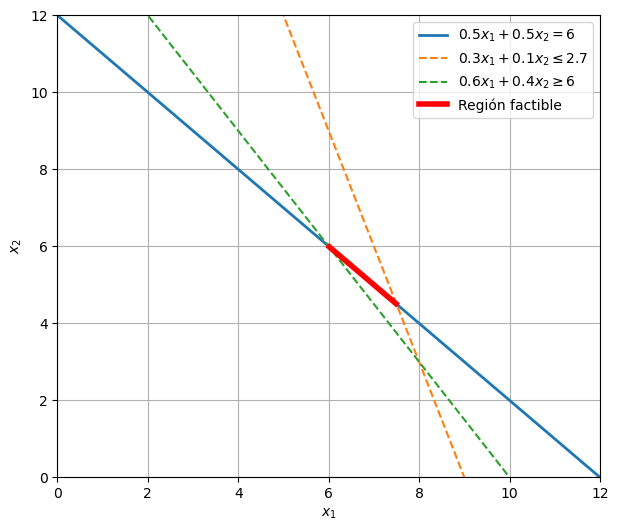

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 12, 400)

x2_eq = 12 - x1                     
x2_c1 = (2.7 - 0.3*x1) / 0.1       
x2_c3 = (6 - 0.6*x1) / 0.4          

mask = (
    (x2_eq <= x2_c1) &     
    (x2_eq >= x2_c3) &     
    (x2_eq >= 0) &         
    (x1 >= 0)            
)


plt.figure(figsize=(7, 6))

plt.plot(x1, x2_eq, label=r'$0.5x_1 + 0.5x_2 = 6$', linewidth=2)
plt.plot(x1, x2_c1, '--', label=r'$0.3x_1 + 0.1x_2 \leq 2.7$')
plt.plot(x1, x2_c3, '--', label=r'$0.6x_1 + 0.4x_2 \geq 6$')

plt.plot(x1[mask], x2_eq[mask], 'r', linewidth=4, label='Región factible')

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)

plt.show()
